In [43]:
import numpy as np
from rdkit import Chem
import datamol as dm
from molfeat.trans.pretrained.hf_transformers import PretrainedHFTransformer

trans_cpu = PretrainedHFTransformer("ChemBERTa-77M-MLM")
trans_cpu1 = PretrainedHFTransformer("ChemBERTa-77M-MLM")

In [1]:
from molfeat.trans.pretrained.hf_transformers import HFExperiment
from molfeat.trans.pretrained.hf_transformers import HFModel
from molfeat.store import ModelInfo
from molfeat.store import ModelStore


molt5_card = ModelInfo(
    name = "MolT5",
    inputs = "smiles",
    type="pretrained",
    group="huggingface",
    version=0,
    submitter="Desmond Gilmour",
    description="MolT5 is a self-supervised learning framework that pretrains transformer-based models on vast amounts of unlabeled natural language text and molecule strings allowing generation of high-quality outputs for molecule captioning and text-based molecule generation.",
    representation="line-notation",
    require_3D=False,
    tags = ["smiles", 'huggingface', "transformers", "text2text", "T5", "Zinc-15", "ChEBI-20"],
    authors= ["Tuan Manh Lai", "Carl Edwards", "Kevin Ros", "Garret Honke", "Kyunghyun Cho", "Heng Ji"],
    reference = "https://arxiv.org/pdf/2204.11817.pdf" 
)

# attempt to register the model
model = HFModel.register_pretrained("laituan245/molt5-large-smiles2caption", "laituan245/molt5-large-smiles2caption", molt5_card)

C:\Users\alexander.korolyov\miniforge3\envs\chem\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

C:\Users\alexander.korolyov\miniforge3\envs\chem\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alexander.korolyov\.cache\huggingface\hub\models--laituan245--molt5-large-smiles2caption. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

  0%|          | 0/8 [00:00<?, ?it/s]

_request non-retriable exception: Anonymous caller does not have storage.buckets.get access to the Google Cloud Storage bucket. Permission 'storage.buckets.get' denied on resource (or it may not exist)., 401
Traceback (most recent call last):
  File "C:\Users\alexander.korolyov\miniforge3\envs\chem\lib\site-packages\gcsfs\retry.py", line 130, in retry_request
    return await func(*args, **kwargs)
  File "C:\Users\alexander.korolyov\miniforge3\envs\chem\lib\site-packages\gcsfs\core.py", line 440, in _request
    validate_response(status, contents, path, args)
  File "C:\Users\alexander.korolyov\miniforge3\envs\chem\lib\site-packages\gcsfs\retry.py", line 117, in validate_response
    raise HttpError(error)
gcsfs.retry.HttpError: Anonymous caller does not have storage.buckets.get access to the Google Cloud Storage bucket. Permission 'storage.buckets.get' denied on resource (or it may not exist)., 401


HttpError: Anonymous caller does not have storage.buckets.get access to the Google Cloud Storage bucket. Permission 'storage.buckets.get' denied on resource (or it may not exist)., 401

In [44]:
from molfeat.store.modelstore import ModelStore

store = ModelStore()
[x.name for x in store]

TypeError: 'ModelStore' object is not iterable

In [30]:
import torch
torch.device('cuda')

device(type='cuda')

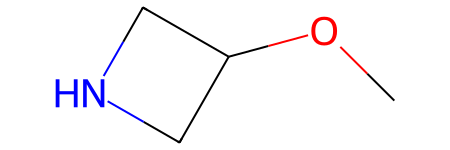

In [31]:
smi = 'C1nCC1OC'
Chem.MolFromSmiles(smi)

In [37]:
%time trans_cpu([smi] * 10000).shape

CPU times: total: 4.19 s
Wall time: 3.2 s


(10000, 384)

In [38]:
print(trans_cpu([smi])[0, :5].round(3))
print(trans_cpu1([smi])[0, :5].round(3))

[-0.053  0.174 -0.05  -0.088 -0.112]
[-0.053  0.174 -0.05  -0.088 -0.112]


In [42]:
import numpy as np
np.isclose(trans_cpu([smi]), trans_cpu1([smi])).all()

True